# Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [7]:
# import libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm

In [8]:
# load Tables
train_flights_df = pd.read_csv('data/train_flights_df_random.csv', sep = ',')

In [9]:
train_flights_df.head(10)

,fl_date,unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,...,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost
0,2018-08-18,UA,UA_CODESHARE,5752,OO,5752,MFR,"Medford, OR",DEN,"Denver, CO",...,319004221.0,344423320.0,164053458.0,117380657.0,65302471.0,346736586.0,691159906.0,346659053.0,347764669.0,694423722.0
1,2019-05-04,WN,WN,4566,WN,4566,SJC,"San Jose, CA",STL,"St. Louis, MO",...,179914831.0,371652892.0,0.0,0.0,6309955.0,6309955.0,377962847.0,371853619.0,6309955.0,378163574.0
2,2018-12-05,AS,AS,19,AS,19,MCO,"Orlando, FL",SEA,"Seattle, WA",...,59640959.0,124274679.0,0.0,0.0,2981090.0,2981090.0,127255769.0,124358971.0,2981090.0,127340061.0
3,2018-06-25,AS,AS_CODESHARE,2098,QX,2098,MFR,"Medford, OR",PDX,"Portland, OR",...,64229624.0,149466966.0,0.0,0.0,2654738.0,2654738.0,152121704.0,149647804.0,2654738.0,152302542.0
4,2018-08-21,UA,UA_CODESHARE,5552,OO,5552,ORD,"Chicago, IL",GRR,"Grand Rapids, MI",...,319004221.0,344423320.0,164053458.0,117380657.0,65302471.0,346736586.0,691159906.0,346659053.0,347764669.0,694423722.0
5,2018-02-11,AA,AA,2373,AA,2373,LAX,"Los Angeles, CA",DFW,"Dallas/Fort Worth, TX",...,261946387.0,320337213.0,62220618.0,43790860.0,94212692.0,200224170.0,520561383.0,321390510.0,200591763.0,521982273.0
6,2018-12-15,B6,B6,136,B6,136,PHX,"Phoenix, AZ",JFK,"New York, NY",...,74132762.0,116905050.0,0.0,0.0,31565497.0,31565497.0,148470547.0,116905050.0,31565497.0,148470547.0
7,2018-08-24,AA,AA,1957,AA,1957,DEN,"Denver, CO",CLT,"Charlotte, NC",...,334937605.0,425451929.0,142983221.0,49435800.0,105148593.0,297567614.0,723019543.0,426346992.0,297885732.0,724232724.0
8,2019-02-27,DL,DL_CODESHARE,5330,9E,5330,DTW,"Detroit, MI",CWA,"Mosinee, WI",...,248074450.0,313961048.0,87132937.0,50931775.0,54187883.0,192252595.0,506213643.0,319361813.0,193062831.0,512424644.0
9,2018-03-16,B6,B6,90,B6,90,SAN,"San Diego, CA",JFK,"New York, NY",...,69593014.0,115122701.0,0.0,0.0,27078384.0,27078384.0,142201085.0,115143298.0,27078384.0,142221682.0


In [10]:
# check shape (# of rowns and columns)
train_flights_df.shape

(78404, 55)

In [11]:
# check data types
train_flights_df.dtypes

fl_date                 object
unique_carrier          object
branded_code_share      object
mkt_carrier_fl_num       int64
op_unique_carrier       object
op_carrier_fl_num        int64
origin                  object
origin_city_name        object
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code        int64
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_air

In [12]:
# dropping columns that dont look important
train_flights_df.drop(columns=['branded_code_share',
           'mkt_carrier', 'cancelled', 'cancellation_code', 'flights', 'air_time',
            'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'], inplace=True)

KeyError: "['mkt_carrier', 'flights', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'] not found in axis"

In [ ]:
# select delay columns as they are important to the first task
train_flights_delays = train_flights_df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_delay', 'dep_delay']]

In [ ]:
# replace NaN in delay columns with mean and save ot original dataframe
train_flights_df.fillna(train_flights_df.mean(), inplace=True)
train_flights_df

In [ ]:
train_flights_df.isnull().sum()

In [ ]:
train_flights_df

## **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [16]:
# select delay columns as they are important to the first task
train_flights_delays = train_flights_df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_delay', 'dep_delay']]

In [17]:
# normalize data with z-score as it can test for normal distribution and outliers
train_flights_delays_zscore = train_flights_delays.apply(zscore)
train_flights_delays_zscore

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay,dep_delay
0,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,-0.364476,-0.381773
1,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,-0.070609,0.007987
2,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,-0.658343,-0.422801
3,3.682226,-0.049682,-0.006779,-0.01708,-0.203104,2.162777,2.100382
4,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,0.125302,0.172096
...,...,...,...,...,...,...,...
78399,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,-0.168565,-0.238178
78400,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,-0.501614,-0.217664
78401,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,-0.482023,-0.320232
78402,-0.135606,-0.049682,-0.167608,-0.01708,-0.203104,-0.168565,0.028500


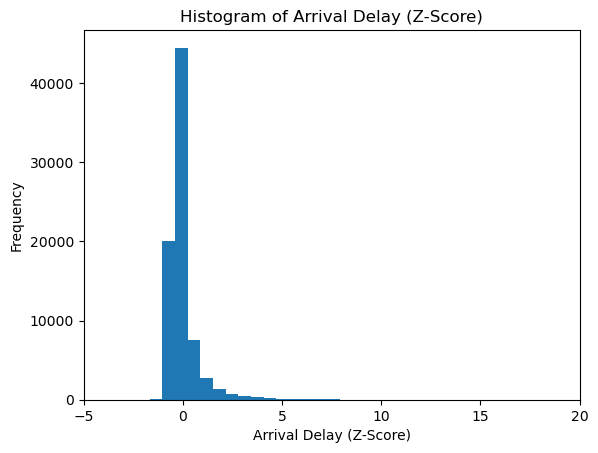

In [18]:
# plot arr_delay histogram
plt.hist(train_flights_delays_zscore['arr_delay'], bins=50)
plt.title("Histogram of Arrival Delay (Z-Score)")
plt.xlabel("Arrival Delay (Z-Score)")
plt.ylabel("Frequency")
plt.xlim(-5, 20)  # x-axis limits to show negative values
plt.show()

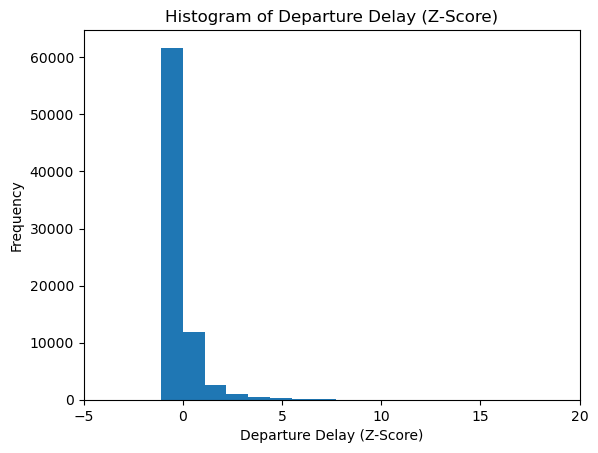

In [19]:
# plot dep_delay histogram
plt.hist(train_flights_delays_zscore['dep_delay'], bins=30)
plt.title("Histogram of Departure Delay (Z-Score)")
plt.xlabel("Departure Delay (Z-Score)")
plt.ylabel("Frequency")
plt.xlim(-5, 20) # x-axis limits to show negative values
plt.show()

We can see both charts do not follow a normal distribution and seem skewed to the right. Also do not see any major outliers for both plots

### Arrival delay shapiro test

In [20]:
# shapiro-wilk normality test on arr_delay
stat, p_value = shapiro(train_flights_delays_zscore['arr_delay'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [21]:
# print the test results:
print(f"Shapiro-Wilk test statistic: {stat: .5f}, p-value: {p_value: .5f}") # .5f sets decimal of float to 5
if p_value > 0.05:
    print('arr_delay is normally distributed')
else:
    print('since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.')

Shapiro-Wilk test statistic:  0.47038, p-value:  0.00000
since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.


### Departure delay shapiro test

In [22]:
# shapiro-wilk normality test on dep_delay
stat, p_value = shapiro(train_flights_delays_zscore['dep_delay'])

In [23]:
print(f"Shapiro-Wilk test statistic: {stat: .5f}, p-value: {p_value: .5f}") # .5f sets decimal of float to 5
if p_value > 0.05:
    print('arr_delay is normally distributed')
else:
    print('since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.')

Shapiro-Wilk test statistic:  0.36567, p-value:  0.00000
since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.


## **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [24]:
# Select columns: flight date, arrival and departure delay
monthly_delays = train_flights_df[['fl_date', 'arr_delay', 'dep_delay']]
monthly_delays

,fl_date,arr_delay,dep_delay
0,2018-08-18,-13.0,-8.0
1,2019-05-04,2.0,11.0
2,2018-12-05,-28.0,-10.0
3,2018-06-25,116.0,113.0
4,2018-08-21,12.0,19.0
...,...,...,...
78399,2019-06-19,-3.0,-1.0
78400,2019-06-24,-20.0,0.0
78401,2019-05-23,-19.0,-5.0
78402,2019-08-21,-3.0,12.0


In [25]:
# fl_date is an object but should be converted to datetime
monthly_delays.dtypes

fl_date       object
arr_delay    float64
dep_delay    float64
dtype: object

In [26]:
# convert to datetime
monthly_delays['fl_date'] = pd.to_datetime(monthly_delays['fl_date'])

C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_388\1986730219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_delays['fl_date'] = pd.to_datetime(monthly_delays['fl_date'])


In [27]:
# make a month column for easier readability 
monthly_delays['month'] = monthly_delays['fl_date'].dt.month

C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_388\292276202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_delays['month'] = monthly_delays['fl_date'].dt.month


In [28]:
monthly_delays.dtypes

fl_date      datetime64[ns]
arr_delay           float64
dep_delay           float64
month                 int64
dtype: object

In [29]:
monthly_delays.head()

,fl_date,arr_delay,dep_delay,month
0,2018-08-18,-13.0,-8.0,8
1,2019-05-04,2.0,11.0,5
2,2018-12-05,-28.0,-10.0,12
3,2018-06-25,116.0,113.0,6
4,2018-08-21,12.0,19.0,8


In [30]:
# since we have the month column and only need that to answer this task we can remove fl_date
monthly_delays = monthly_delays.drop('fl_date', axis = 1)

In [31]:
monthly_delays.head()

,arr_delay,dep_delay,month
0,-13.0,-8.0,8
1,2.0,11.0,5
2,-28.0,-10.0,12
3,116.0,113.0,6
4,12.0,19.0,8


In [32]:
monthly_delays.isnull().sum()

arr_delay    0
dep_delay    0
month        0
dtype: int64

In [33]:
# calculate mean monthly delay
monthly_delays_mean = monthly_delays.groupby('month').mean()
monthly_delays_mean

,arr_delay,dep_delay
month,,
1,4.304698,10.297780
2,5.752748,10.724635
3,2.936123,8.613014
4,3.460564,8.616046
5,6.543094,11.404075
6,11.055258,15.358734
7,8.551533,13.057212
8,9.484580,13.829866
9,1.697463,6.655183


In [34]:
# calculate median monthly delay
monthly_delays_median = monthly_delays.groupby('month').median()
monthly_delays_median

,arr_delay,dep_delay
month,,
1,-7.0,-3.0
2,-6.0,-2.0
3,-7.0,-2.0
4,-7.0,-3.0
5,-6.0,-2.0
6,-4.0,-1.0
7,-5.0,-2.0
8,-5.0,-2.0
9,-8.0,-3.0


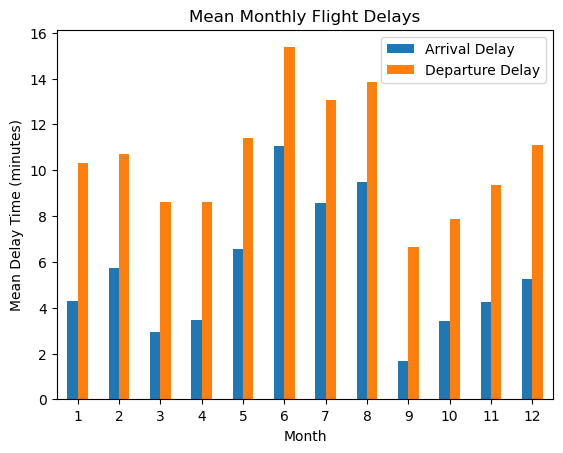

In [35]:
# plotting mean of monthly delays as bar chart
monthly_delays_mean.plot.bar(rot=1) # rot = 1 makes x-axis lables horizontal
plt.xlabel('Month')
plt.ylabel('Mean Delay Time (minutes)')
plt.title('Mean Monthly Flight Delays')
plt.legend(['Arrival Delay', 'Departure Delay'])
plt.show()

We can see that June & July has the highest average departure and arrival delays.

## **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

## **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [36]:
train_flights_df.columns

Index(['fl_date', 'unique_carrier', 'branded_code_share', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'route_id', 'month', 'year',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost'],
      dtype='object')

In [37]:
# select columns for taxi times
taxi_times = train_flights_df[['taxi_in', 'taxi_out', 'wheels_off', 'dep_time', 'dep_delay']]
taxi_times.head()

,taxi_in,taxi_out,wheels_off,dep_time,dep_delay
0,12.0,11.0,1546.0,1535.0,-8.0
1,4.0,10.0,1201.0,1151.0,11.0
2,7.0,15.0,1820.0,1805.0,-10.0
3,7.0,7.0,1908.0,1901.0,113.0
4,5.0,22.0,1831.0,1809.0,19.0


In [38]:
# create new column with the total time of taxis in and out
taxi_times['taxi_total_time'] = taxi_times['taxi_in'] + taxi_times['taxi_out']
taxi_times.head()

C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_388\244537654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_times['taxi_total_time'] = taxi_times['taxi_in'] + taxi_times['taxi_out']


,taxi_in,taxi_out,wheels_off,dep_time,dep_delay,taxi_total_time
0,12.0,11.0,1546.0,1535.0,-8.0,23.0
1,4.0,10.0,1201.0,1151.0,11.0,14.0
2,7.0,15.0,1820.0,1805.0,-10.0,22.0
3,7.0,7.0,1908.0,1901.0,113.0,14.0
4,5.0,22.0,1831.0,1809.0,19.0,27.0


In [39]:
# extract hour from dep_time and insert as new column to see the hours of the flights throughout the day
# first convert dep_time to datetime
taxi_times['dep_time'] = pd.to_datetime(taxi_times['dep_time'], format='%H%M', errors='coerce')

C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_388\181211737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_times['dep_time'] = pd.to_datetime(taxi_times['dep_time'], format='%H%M', errors='coerce')


In [40]:
# make dep_hr column
taxi_times['dep_hr'] = taxi_times['dep_time'].dt.hour
taxi_times.head()

C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_388\1082825520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_times['dep_hr'] = taxi_times['dep_time'].dt.hour


,taxi_in,taxi_out,wheels_off,dep_time,dep_delay,taxi_total_time,dep_hr
0,12.0,11.0,1546.0,1900-01-01 15:35:00,-8.0,23.0,15.0
1,4.0,10.0,1201.0,1900-01-01 11:51:00,11.0,14.0,11.0
2,7.0,15.0,1820.0,1900-01-01 18:05:00,-10.0,22.0,18.0
3,7.0,7.0,1908.0,1900-01-01 19:01:00,113.0,14.0,19.0
4,5.0,22.0,1831.0,1900-01-01 18:09:00,19.0,27.0,18.0


In [41]:
# we now use the columns 'taxi_total_time' and 'dep_hr' while dropping the rest so we can compare
taxi_times = taxi_times.drop(['taxi_in', 'taxi_out', 'wheels_off', 'dep_time', 'dep_delay'], axis=1)

In [42]:
taxi_times.head()

,taxi_total_time,dep_hr
0,23.0,15.0
1,14.0,11.0
2,22.0,18.0
3,14.0,19.0
4,27.0,18.0


In [43]:
# calculate mean/avg of 'taxi_total_times' by the hours in a day
taxi_times_mean = taxi_times.groupby('dep_hr').mean()
taxi_times_mean

,taxi_total_time
dep_hr,
1.0,24.280000
2.0,22.693333
3.0,20.395349
4.0,22.463504
5.0,24.832910
6.0,25.228321
7.0,25.877655
8.0,26.892557
9.0,25.514386


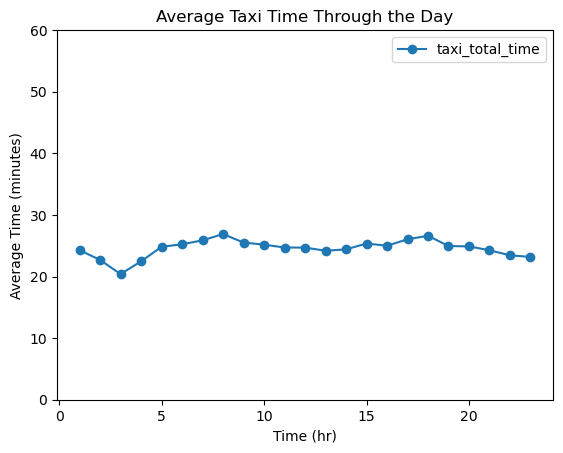

In [44]:
# create line plot to show relationship
ax = taxi_times_mean.plot(y=['taxi_total_time'], marker='o')

# set y-axis limits
ax.set_ylim(bottom=0, top=60)

# labels and title
plt.xlabel('Time (hr)')
plt.ylabel('Average Time (minutes)')
plt.title('Average Taxi Time Through the Day')
plt.legend()

# show the plot
plt.show()

This graph shows us that the taxi times stay relatively constant throughout the day between 20-30 minutes.

## **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [45]:
train_flights_df.columns

Index(['fl_date', 'unique_carrier', 'branded_code_share', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'route_id', 'month', 'year',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost'],
      dtype='object')

In [46]:
# percentage of arrival delays caused by departure delay
# calculate total arrival delayed flights
total_delayed_flights = len(train_flights_df[train_flights_df['arr_delay'] > 0])
print('Total number of delayed flights:', total_delayed_flights)

Total number of delayed flights: 27537


In [47]:
# calculate departure delayed flights where arrival delay is also present
departure_delayed_flights = len(train_flights_df[(train_flights_df['dep_delay'] > 0) & (train_flights_df['arr_delay'] > 0)])
print('Total number of departure delayed flights:', departure_delayed_flights)

Total number of departure delayed flights: 19620


In [48]:
# calculate percentage of delays caused by departure delays
percentage_departure_delay = departure_delayed_flights / total_delayed_flights * 100
print(f"The average percentage of delays caused by departure delay is {percentage_departure_delay:.2f}%")

The average percentage of delays caused by departure delay is 71.25%


In [49]:
# calculate the average delay time during the flight
average_in_flight_delay = train_flights_df['arr_delay'].mean() - train_flights_df['dep_delay'].mean()
print(f"The average delay time during the flight is {average_in_flight_delay:.2f} minutes")

The average delay time during the flight is -5.01 minutes


#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [50]:
train_flights_df.columns

Index(['fl_date', 'unique_carrier', 'branded_code_share', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'route_id', 'month', 'year',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost'],
      dtype='object')

In [51]:
# calculate speed (which is in miles per hour)
train_flights_df['speed'] = train_flights_df['distance'] / (train_flights_df['actual_elapsed_time'] / 60) # divide by 60 to get hours from minutes

In [52]:
# fit linear regression model
X = sm.add_constant(train_flights_df['dep_delay'])
model = sm.OLS(train_flights_df['speed'], X)
results = model.fit()

In [53]:
# print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1788
Date:                Fri, 24 Mar 2023   Prob (F-statistic):              0.672
Time:                        13:07:58   Log-Likelihood:            -4.6575e+05
No. Observations:               78404   AIC:                         9.315e+05
Df Residuals:                   78402   BIC:                         9.315e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        314.7041      0.336    936.187      0.0

Since the p-value is 0.672 we accept the null-hypothesis.

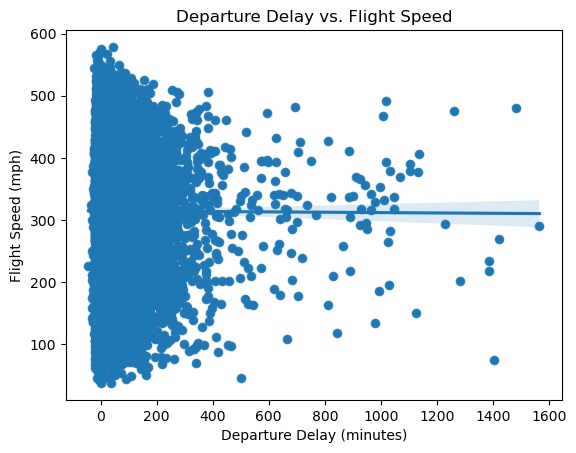

In [54]:
# create a scatter plot of departure delay vs. speed
sns.scatterplot(x='dep_delay', y='speed', data=train_flights_df)

# fit a linear regression line to the data
sns.regplot(x='dep_delay', y='speed', data=train_flights_df)

# set plot title and axis labels
plt.title('Departure Delay vs. Flight Speed')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Flight Speed (mph)')

# display the plot
plt.show()

Even with this scatter plot we can see that planes very rarely fly faster when there is a delay.

## **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

## **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

## **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?